In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
url = 'https://raw.githubusercontent.com/ovlathkar/Salary-Prediction-Using-Polynomial-Regression/refs/heads/main/Position_Salaries.csv'

def read_file(url):
  data = pd.read_csv(url)
  return data
read_file(url)



,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
def perform_eda (data):
  print("Performing EDA for dataset")
  print("First 5 rows")
  print(data.head())
  print("\nData info\n", data.info())
  print("\nDescriptive Stats\n", data.describe())
  print("\nMissing Values:\n", data.isnull().sum())
data = read_file(url)
perform_eda(data)

Performing EDA for dataset
First 5 rows
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes

Data info
 None

Descriptive Stats
           Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000

Missing Values:
 Position    0
Level       0
Salary      0
dtype: int64


Salary distribution chart


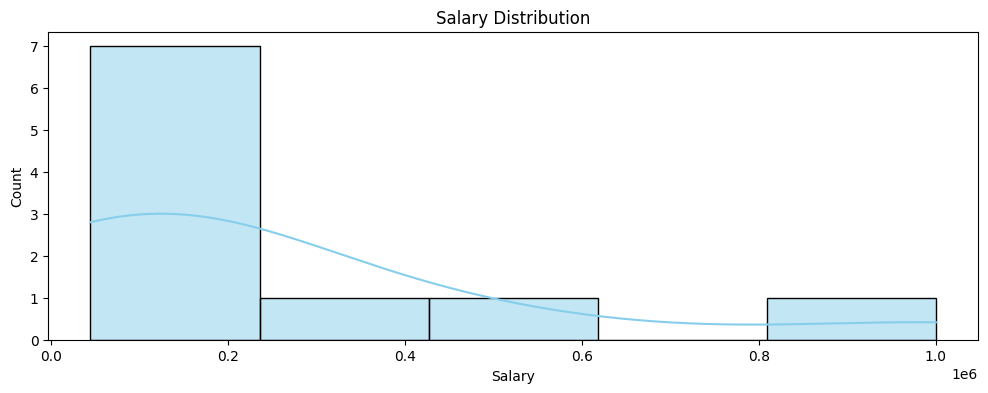

In [5]:
def visualize_salary_dist(data):
  print("Salary distribution chart")
  plt.figure(figsize=(12,4))
  sns.histplot(data['Salary'], kde = True, color = 'skyblue')
  plt.title('Salary Distribution')
  plt.xlabel('Salary')
  plt.ylabel('Count')
  plt.show()
data = read_file(url)
visualize_salary_dist(data)

Scatter Plot for level and salary


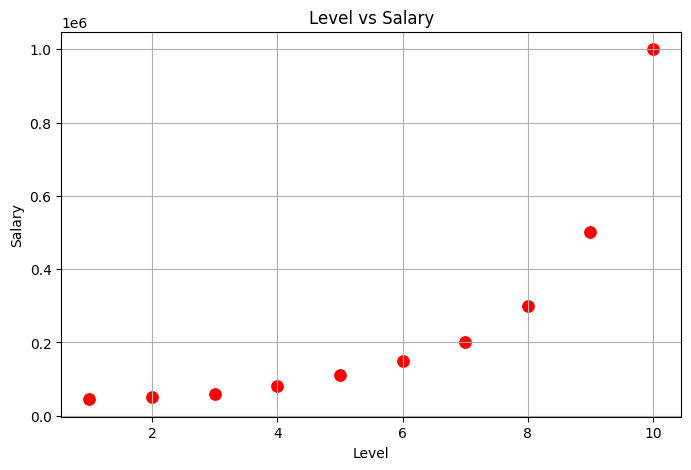

In [6]:
def scatter_plt(data):
  print("Scatter Plot for level and salary")
  plt.figure(figsize=(8, 5))
  sns.scatterplot(x='Level', y='Salary', data=data, color='red', s=100)
  plt.title('Level vs Salary')
  plt.xlabel('Level')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()
data = read_file(url)
scatter_plt(data)


Correlation Heatmap


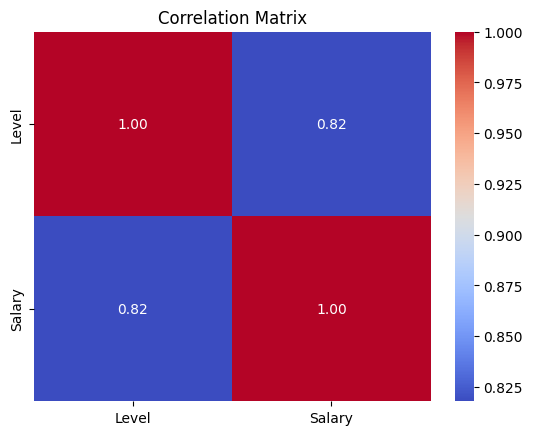

In [7]:
def corr_heatmap(data):
  print("Correlation Heatmap")
  sns.heatmap(data[['Level', 'Salary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix')
  plt.show()
data = read_file(url)
corr_heatmap(data)

Model built successfully


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


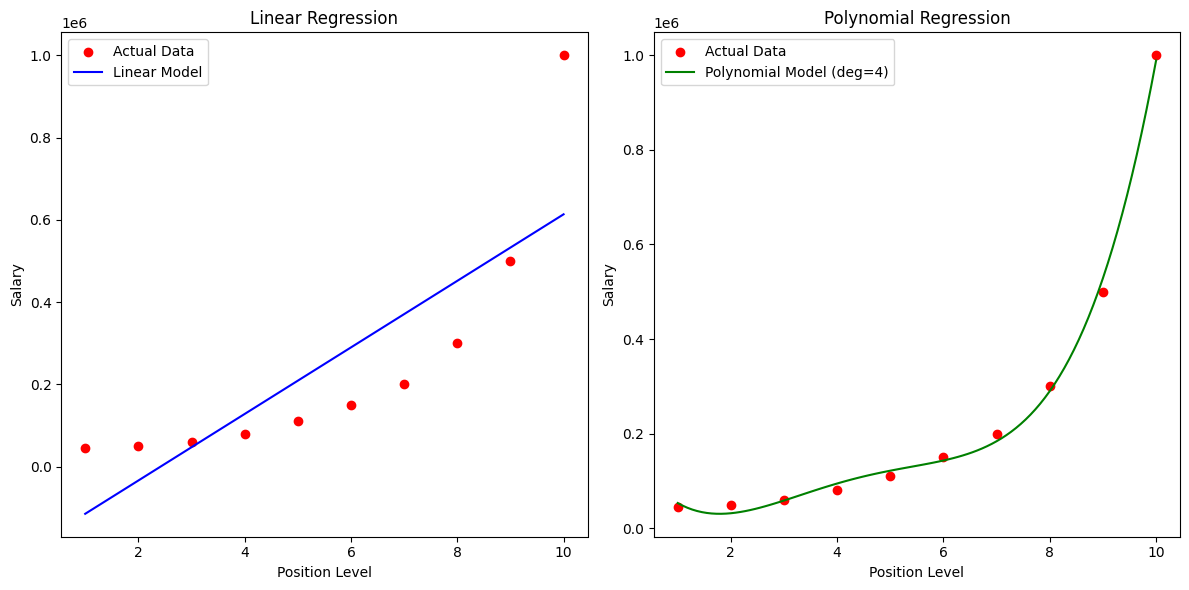

In [9]:

data = read_file(url)

X = data[['Level']]
y = data['Salary']
model = LinearRegression()
model.fit(X, y)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
print("Model built successfully")
X_grid = np.linspace(X['Level'].min(), X['Level'].max(), 100).reshape(-1, 1)
X_grid_poly = poly_features.transform(X_grid)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_grid, model.predict(X_grid), color='blue', label='Linear Model')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_grid, poly_reg.predict(X_grid_poly), color='green', label='Polynomial Model (deg=4)')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.tight_layout()
plt.show()





In [13]:
print("Predicting salary for level 6.5")
level_65 = np.array([[6.5]])
salary_lin = model.predict(level_65)[0]
salary_poly = poly_reg.predict(poly_features.transform(level_65))[0]

print("Linear Regression Salary Prediction for Level 6.5:",salary_lin)
print("Polynomial Regression Salary Prediction for Level 6.5:", salary_poly)

Predicting salary for level 6.5
Linear Regression Salary Prediction for Level 6.5: 330378.78787878784
Polynomial Regression Salary Prediction for Level 6.5: 158862.45265155006


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [16]:
print("Model Diagnostics")
print("R2 score for Linear Regression:", r2_score(y, model.predict(X)))
print("R2 score for Polynomial Regression:", r2_score(y, poly_reg.predict(X_poly)))
print("Mean Absolute Error (MAE) for Linear Regression:", mean_absolute_error(y, model.predict(X)))
print("Mean Absolute Error (MAE) for Polynomial Regression:", mean_absolute_error(y, poly_reg.predict(X_poly)))
print("Mean Squared Error (MSE) for Linear Regression:", mean_squared_error(y, model.predict(X)))
print("Mean Squared Error (MSE) for Polynomial Regression:", mean_squared_error(y, poly_reg.predict(X_poly)))

Model Diagnostics
R2 score for Linear Regression: 0.6690412331929895
R2 score for Polynomial Regression: 0.9973922891706614
Mean Absolute Error (MAE) for Linear Regression: 128454.54545454546
Mean Absolute Error (MAE) for Polynomial Regression: 12681.818181828514
Mean Squared Error (MSE) for Linear Regression: 26695878787.878784
Mean Squared Error (MSE) for Polynomial Regression: 210343822.84381685
